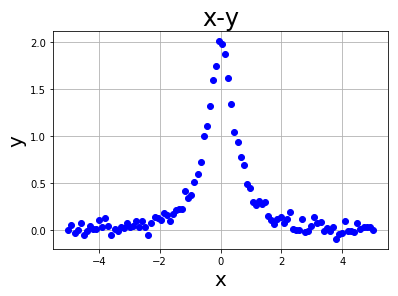

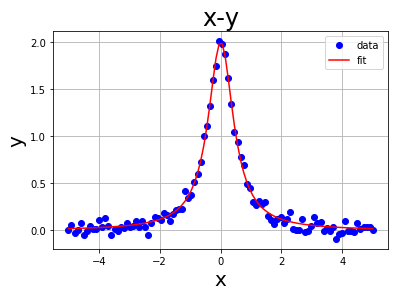

In [1]:
#####################
# Fitting codes with assistant from mouse click to get initial parameters
# GitHub: YCHEN-NYU
# Date: 2017-11-15
# refto: 
# 	https://stackoverflow.com/questions/25521120/store-mouse-click-event-coordinates-with-matplotlib
# 	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# 	https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html
# 	http://mathworld.wolfram.com/GaussianFunction.html
# 	http://mathworld.wolfram.com/LorentzianFunction.html
#####################
# TODO: make Mouse Click more smarter and efficient for getting reasonable p0 and bounds = (lower_bound, upper_bound), maxfev
# TODO: make functions much more flexible and object-oriented, try to write codes in production quality


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 3 clicks
    if len(coords) == 3:
        fig.canvas.mpl_disconnect(cid)
        plt.close()
    return

# find the nearest point providing the value and array
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# plot x, y data with shape parameter and label parameter passing into the function 
def plotxy(x, y, shape_str, label_str):
	plt.plot(x, y, shape_str, label = label_str)
	plt.grid(True)
	plt.xlabel('x', fontsize=20)
	plt.ylabel('y', fontsize=20)
	plt.title('x-y', fontsize=24)

# Linear
def lin_fit(x, a, b):
	return a*x + b

# sine
def sin_curve(x, a, b, c, d):
	return a*np.sin(b*(x - c)) + d

# cosine
def cos_curve(x, a, b, c, d):
	return a*np.cos(b*(x - c)) + d

# exponential 
def exp_curve(x, a, b, c):
	return a*np.exp(-b*x) + c

# Gaussian function, amplitude: a, center: mu, std: sigma
def gaussian(x, a, mu, sigma):
	return a*np.exp(-(x-mu)**2/(2*sigma**2))

# Lorentzian: amplitude: a, center: x0, w: FWHM
def Lorentzian(x, a, x0, w):
	return a*(w/2)/((x - x0)**2 + (w/2)**2)

# prepare dummy data with some noise
fig = plt.figure()
xdata = np.linspace(-5, 5, 100)
ydata = Lorentzian(xdata, 1, 0, 1)
noise_ratio = 0.05
ynoise = noise_ratio*np.random.normal(loc = 0.0, size = len(ydata))
ydata += ynoise

# plot out dummy data
plotxy(xdata, ydata, 'bo', 'data')
coords = []

# Call click func, show the plot for Mouse Click, close fig afterwards
# You can change how many points to click from the onclick function
# TODO: pass NumberOfClicks as an argument to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

# fit data with curve_fit function from scipy.optimize
# TODO: get more precise initial parameters p0 from Mouse Click for the fitting
# TODO: Define a local region for fitting in order to eliminate nonsense points
popt, pcov = curve_fit(Lorentzian, xdata, ydata)

fig = plt.figure()
data_plot = plotxy(xdata, ydata, 'bo', 'data')
fit_plot = plotxy(xdata, Lorentzian(xdata, *popt), 'r-', 'fit')

# print out clicked positions (x, y)
for element in coords:
	print(element)

# Show data by mouse clicks
for element in coords:
	plt.plot(element[0], element[1], 'gx', markersize=10)

# add legends and show figure
plt.legend(loc='best')
plt.show()